# 1. Proses Import Data

## 1.1. Import Library Panda dan Numpy

In [200]:
import pandas as pd
import numpy as np


In [201]:
# meng-import SaaS-Sales.csv dari file Purwadhika di laptop
dataset_path = "C:\\Users\\ASUS\\OneDrive\\Desktop\\Purwadhika\\Capstone\\Capstone Project 2\\SaaS-Sales.csv"

## 1.2. Proses Membaca Data

In [202]:
saas_sales = pd.read_csv(dataset_path)

In [203]:
# membaca dataset dan mencari informasi berapa jumlah baris dan kolomnya.

print(f"Jumlah baris dan kolom di dataset SaaS-Sales adalah {saas_sales.shape}")
saas_sales.info()

Jumlah baris dan kolom di dataset SaaS-Sales adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount

Dataset SaaS-Sales ini berisi informasi terkait transaksi penjualan SaaS yang terdiri dari 19 kolom sebagai berikut:

1. Row ID: ID unik untuk tiap transaksi.
2. Order ID: ID unik untuk tiap pesanan.
3. Order Date: tanggal pesanan dibuat dalam format dd/mm/yyyy.
Contoh: 11/9/2022

4. Date Key: representasi numerik dari tanggal pesanan dalam format yyyymmdd, memudahkan analisis berbasis tanggal.
Contoh: 20221109

5. Contact Name: nama orang atau kontak yang membuat pesanan.
6. Country: negara pelanggan.
7. City: kota pelanggan.
8. Region: wilayah geografis pelanggan secara luas.
Contoh: EMEA → Europe, Middle East, Africa; AMER → Americas

9. Subregion: bagian dari wilayah yang lebih spesifik.
Contoh: UKIR → United Kingdom & Ireland; NAMER → North America

10. Customer: nama perusahaan atau individu pelanggan yang melakukan pesanan.
11. Customer ID: ID unik untuk setiap pelanggan.
12. Industry: industri tempat pelanggan beroperasi.
13. Segment: segmen pelanggan (misal: Small Medium Business/SMB, Strategic, Enterprise, dll).
14. Product: produk yang dipesan.
15. License: tipe lisensi produk (misal: Basic, Pro, Enterprise).
16. Sales: total nilai penjualan untuk transaksi, tanpa menyertakan satuan mata uang.
17. Quantity: jumlah unit produk yang dibeli.
18. Discount: diskon yang diterapkan pada transaksi.
19. Profit: keuntungan dari transaksi.

# 2. Proses Cleaning Data

## 2.1. Mengidentifikasi Missing Values

In [53]:
# Menghitung missing values per kolom

print(f"jumlah missing values di SaaS-Sales dataset adalah {saas_sales.isna().sum().sum()}")
saas_sales.isna().sum()


jumlah missing values di SaaS-Sales dataset adalah 0


Row ID           0
Order ID         0
Order Date       0
Date Key         0
Contact Name     0
Country          0
City             0
Region           0
Subregion        0
Customer         0
Customer ID      0
Industry         0
Segment          0
Product          0
License          0
Sales            0
Quantity         0
Discount         0
Profit           0
Product_Clean    0
dtype: int64

## 2.2. Menampilkan 10 Baris Pertama pada Data

Kita perlu melihat struktur dan format data sebelum memutuskan langkah pembersihan (misalnya, apakah tanggal sudah terbaca dengan benar? Apakah pendapatan berbentuk angka? apakah tulisan ada yang tidak seragam huruf besar dan kecilnya?dll).

caranya adalah dengan menampilkan 10 baris pertama dari dataset saas_sales.

In [56]:
saas_sales.head(10)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Product_Clean
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,Marketing Suite
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Finance Hub,QLIW57KZUV,731.9400,3,0.00,219.5820,Finance Hub
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,Finance Hub,JI6BVL70HQ,14.6200,2,0.00,6.8714,Finance Hub
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Contact Matcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Contact Matcher
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,Marketing Suite - Gold
5,6,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694,Saa S Connector Pack
6,7,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Chat Bot Plugin,4SYTVM0746,7.2800,4,0.00,1.9656,Chat Bot Plugin
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152,Site Analytics
8,9,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Contact Matcher,XPBOBXWXA3,18.5040,3,0.20,5.7825,Contact Matcher
9,10,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,One View,71J8P9Z1P0,114.9000,5,0.00,34.4700,One View


dari tampilan tabel di atas, terdapat dua temuan menarik:
* ada ketidakseragaman cara penulisan tulisan di kolom "Product" (tanpa spasi dan dengan spasi. Contoh: FinanceHub vs Marketing Suite).
* ada profit negatif sebesar -383.0310 untuk diskon 45% (row ID 4, Royal Dutch Shell), yang bisa menjadi bahan analisis untuk perusahaan.

## 2.3. Standardisasi Penulisan (spasi, huruf kapital, dll.)

In [27]:
# membuat penulisan produk menjadi lebih seragam dengan fungsi regular expression (re) untuk standardisasi penulisan di kolom "Product:

import re

In [28]:
# Dua langkah data cleaning langsung ke kolom "Product":

saas_sales['Product'] = saas_sales['Product'].str.replace(
    r'(?<!^)(?=[A-Z])', ' ', regex=True  # menambahkan spasi di depan huruf kapital, kecuali di awal kata
).str.replace(
    r'\bSaa S\b', 'SaaS', regex=True     # memperbaiki penulisan "Saa S" menjadi "SaaS"
)

# Di Python, awalan r artinya raw string (string mentah).
# Raw string membuat Python tidak menganggap \ (backslash) sebagai karakter spesial.
# Dalam regex, \b artinya batas kata (word boundary), yaitu posisi antara huruf/angka (A–Z, a–z, 0–9, _)
# regex= True, artinya kita perintahkan ke pandas agar pola /b sebagai simbol batas kata di regex, bukan teks biasa (huruf \ dan b)


In [29]:
# mengecek hasil standardisasi penulisan dan update di kolom "Product" di 5 baris awal dan 5 baris akhir:
display(saas_sales.head(), saas_sales.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Product_Clean
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,Marketing Suite
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Finance Hub,QLIW57KZUV,731.9400,3,0.00,219.5820,Finance Hub
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,Finance Hub,JI6BVL70HQ,14.6200,2,0.00,6.8714,Finance Hub
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Contact Matcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Contact Matcher
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,Marketing Suite - Gold


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Product_Clean
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028,Saa S Connector Pack
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332,Saa S Connector Pack
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932,Site Analytics
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200,Support
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,One View,3NTBV9B3PS,243.160,2,0.0,72.9480,One View


## 2.3. Mengecek Data Duplikat

In [43]:
print(f"jumlah data duplikat di SaaS-Sales dataset adalah {saas_sales.duplicated().sum()}")
saas_sales.duplicated().sum()

jumlah data duplikat di SaaS-Sales dataset adalah 0


np.int64(0)

# 3. Summary Statistik/Statistika Ringkas 

Selanjutnya, ditampilkan Summary Statistics, baik untuk kolom numerik (angka) maupun kategorikal (huruf)

In [31]:
saas_sales.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


Dari tabel statistik numerik di atas, terdapat beberapa insight yang perlu diperhatikan sebagai berikut:

* Rata-rata keuntungan/"Profit" per transaksi adalah 28.66 (pembulatan ke atas)
* std menunjukkan seberapa tersebar data. Nilai std yang besar berarti variasi tinggi.
Contoh: "Profit" memiliki std sebesar 234.26 → nilai profit sangat bervariasi.
* min → Nilai terkecil.
Contoh: "Profit" minimum adalah -6599.978 → beberapa transaksi sangat merugikan.
* 25% (Q1) → Persentil ke-25, artinya 25% nilai berada di bawah angka ini.
Contoh: 25% dari Sales berada di bawah 17.28.
* 50% (median) → Nilai tengah dari data.
Contoh: Median Quantity adalah 3 → setengah dari transaksi menjual 3 produk atau kurang.
* 75% (Q3) – Persentil ke-75.
Contoh: 75% dari "Profit" berada di bawah 29.36 (pembulatan).
* max → Nilai terbesar. 
Contoh: "Sales" tertinggi dalam satu transaksi adalah 22638.48.
* Profit berkisar dari -6599 hingga 8399, artinya ada kerugian dan keuntungan yang ekstrem dan berpotensi sebagai outlier.

In [107]:
df = saas_sales.drop(columns=['Product']).rename(columns={'Product_Clean': 'Product'}) # Column "Product" dengan tulisan belum standar di-drop dan diganti dengan "Product_Clean" yang sudah dirapikan

df.describe(include='object')

# Dengan menambahkan include='object', kita bisa melihat statistik kolom non-numerik, seperti:
# - count: jumlah nilai yang tidak null
# - unique: jumlah nilai unik
# - top: nilai yang paling sering muncul
# - freq: frekuensi dari nilai paling sering muncul

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,License,Product,profit_status
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,9994,14,2
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,16GRM07R1K,Contact Matcher,Profit
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1,1842,8058


Dari tabel non-numerik (kategorical) di atas, terdapat beberapa insight yang perlu diperhatikan sebagai berikut:

* Order ID:
  - Ada 5.009 Order ID unik dari 9994 baris data.
* Tanggal Order:
  - Data mencakup sekitar 1.237 tanggal transaksi berbeda.
* Tanggal dengan transaksi terbanyak mencatat 38 pesanan.
* Customer & Kontak:
  - Tercatat 793 nama kontak unik. Kontak yang paling sering muncul terlibat dalam 37 transaksi.
  - Customer terbesar adalah Allianz dengan 192 transaksi.
  - Ini menunjukkan ada pelanggan utama yang memberikan kontribusi signifikan pada penjualan.
*	Wilayah Geografis:
  - Transaksi mencakup 48 negara dan 262 kota.
  - United States adalah negara dengan pesanan terbanyak (2.001 pesanan).
  - London adalah kota dengan order terbanyak (922 pesanan).
  - Dari sisi region & subregion, EMEA mendominasi (4.219 pesanan), diikuti oleh NAMER (2.507 pesanan).
  - Ini menunjukkan bisnis paling kuat di EMEA, tetapi Amerika Utara juga cukup signifikan.
*	Industri dan Segmen:
  - Ada 10 industri, dengan Finance sebagai yang terbesar (2.127 pesanan).
  - Penjualan terbagi dalam 3 segmen, dengan SMB (small and medium businesses/UKM) dengan 5.191 pesanan (terbesar).
  - Artinya, basis pelanggan utama adalah bisnis kecil-menengah, meskipun akun besar juga bisa memberi kontribusi besar pada frekuensi pesanan (yaitu Allianz).
* Produk dan Lisensi:
   - Ada 14 produk yang dijual. Produk teratas adalah Contact Matcher dengan 1.842 transaksi.
   - Semua lisensi bersifat unik (9.994 lisensi berbeda), artinya lisensi dikeluarkan khusus untuk setiap transaksi/pelanggan.



Melihat data unique pada tiap kolom dalam bentuk tabel:

In [59]:
pd.set_option('display.max_colwidth', None) # menampilkan kolom berisi teks panjang tanpa dipotong.

listItem = []
for col in saas_sales.columns :
    listItem.append( [col, saas_sales[col].nunique(), saas_sales[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

# 4. Data Analysis

Kita sudah melakukan tahap data cleaning dan summary statistics. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu karakteristik penjualan SaaS untuk memahami apakah penjualan yang besar dan diskon berpengaruh terhadap profit. Hal ini penting untuk menentukan action plan apa selanjutnya yang harus diambil oleh Board of Directors, tim manajerial, dan marketing untuk meningkatkan profit, mengatasi churn rate tinggi, dan meningkatkan (atau setidaknya menjaga) retensi klien.

## 4.1. Distribusi Profit: Untung vs Rugi 

In [ ]:
# membuat kolom baru bernama "Profit Status" dengan fungsi lambda.
# Kalau x > 0 → ditulis "Profit" (angka positif, maka transaksi untung)
# Kalau x <= 0 → ditulis "Loss" (angka negatif atau nol, transaksi rugi)

saas_sales['profit_status'] = saas_sales['Profit'].apply(lambda x: 'Profit' if x > 0 else 'Loss')
saas_sales['profit_status'].value_counts()

profit_status
Profit    8058
Loss      1936
Name: count, dtype: int64

## 4.1. Berdasarkan Negara 

1. Negara mana dengan profit terbanyak?
2. Kontribusi persentasi profit suatu negara dibandingkan dengan 10 negara dengan profit tertinggi.

In [254]:
df_ct = pd.crosstab(saas_sales['Country'], saas_sales['profit_status'])

df_ct['Total'] = df_ct.sum(axis=1) # axis=1 artinya “horizontal”, jadi jumlah semua kolom dalam satu baris.

df_ct.columns.name = None
df_ct.sort_values('Total', ascending=False).head(10)


,Loss,Profit,Total
Country,,,
United States,117,1884,2001
United Kingdom,54,1087,1141
Japan,492,493,985
France,284,303,587
Canada,23,483,506
Australia,257,235,492
Mexico,211,258,469
Germany,131,252,383
Brazil,1,254,255


## 4.2. Berdasarkan Industri

In [260]:
df_ct = pd.crosstab(saas_sales['Industry'], saas_sales['profit_status'])
df_ct['Total'] = df_ct.sum(axis=1) 
df_ct.columns.name = None   
df_ct.sort_values('Total', ascending=False)

,Loss,Profit,Total
Industry,,,
Finance,398,1729,2127
Energy,255,1061,1316
Tech,233,1003,1236
Manufacturing,240,982,1222
Healthcare,200,849,1049
Consumer Products,224,797,1021
Retail,169,803,972
Communications,129,464,593
Transportation,69,282,351


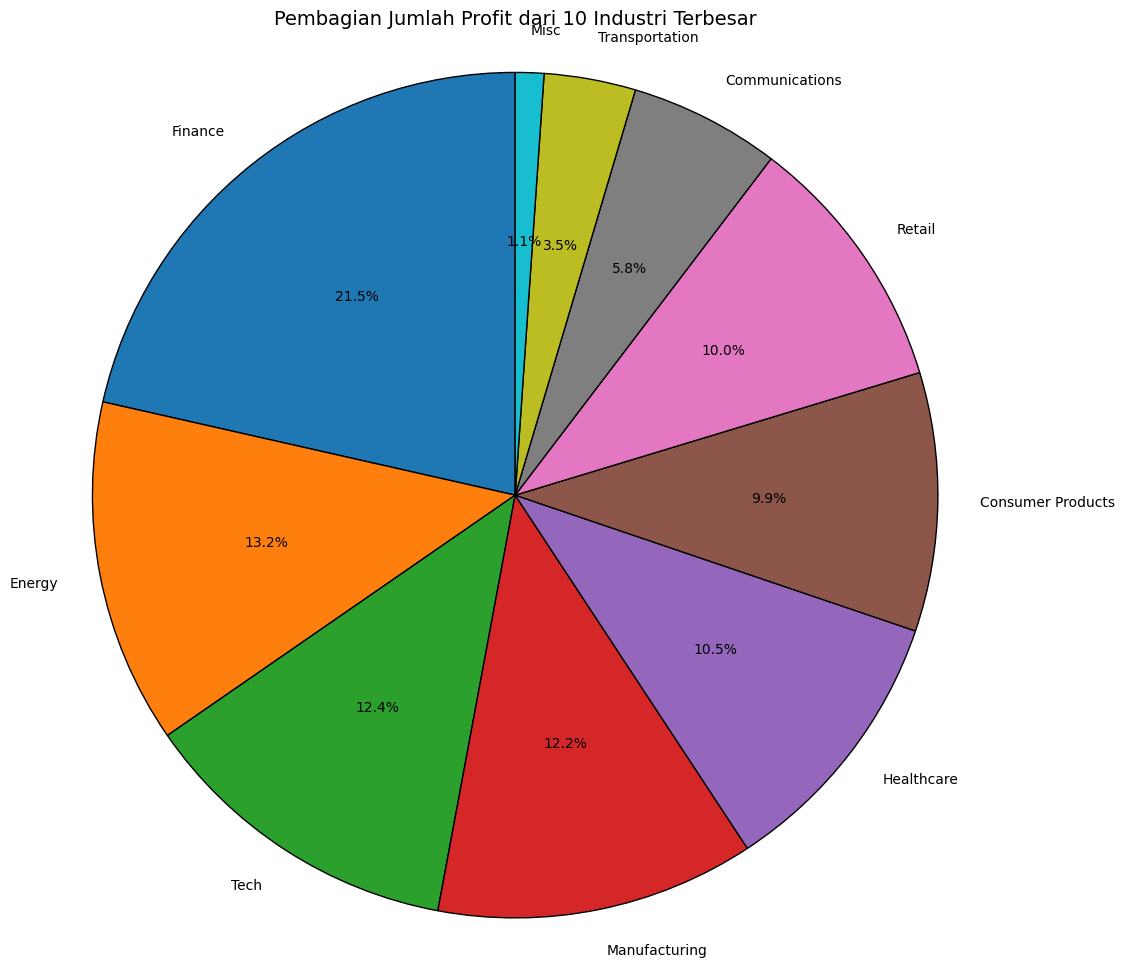

In [261]:
import matplotlib.pyplot as plt

df_top_10 = df_ct.sort_values('Total', ascending=False).head(10)
sizes = df_top_10['Profit']
labels = df_top_10.index
plt.figure(figsize=(12, 12)) 

plt.pie(
    sizes,  
    labels=labels, 
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 10} 
)

plt.title('Pembagian Jumlah Profit dari 10 Industri Terbesar', fontsize=14)
plt.axis('equal') 

plt.show()

Insight:
- Jika sumber daya manusia dan keuangan perusahaan terbatas, sebaiknya diprioritaskan untuk menjaga transaksi profit dari 5 idustri terbesar, yaitu: Finance, Energy, Tech, Manufacturing, Healthcare. Bsia dengan membentuk tim khusus (account executives) yang fungsinya seperti customer service yang rutin berkomunikasi untuk menanyakan pengalaman menggunakan prduk SaaS (customer experience). Bisa juga dengan melakukan onboarding secara berkala sebagai service tambahan untuk client yang paling profit.


## 4.3. Berdasarkan Produk

In [229]:
print(saas_sales.columns.tolist())

['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit', 'profit_status']


In [243]:
import re

saas_sales['Product_Clean'] = saas_sales['Product_Clean'].str.strip().str.replace(r'\s+', ' ', regex=True) # menangani spasi berlebih di tengah nama produk.

saas_sales['Product_Clean'] = saas_sales['Product_Clean'].str.replace(r'Saa\s*S\s*Connector\s*Pack', 'SaaS Connector Pack', regex=True) 
# r'Saa\s*S\s*Connector\s*Pack standardisasi menjadi 'SaaS Connector Pack'
saas_sales['Product_Clean'] = saas_sales['Product_Clean'].str.replace(r'Saa\s*S\s*Connector\s*Pack\s*-\s*Gold', 'SaaS Connector Pack - Gold', regex=True)

df_ct = pd.crosstab(saas_sales['Product_Clean'], saas_sales['profit_status'])
df_ct['Total'] = df_ct.sum(axis=1)
df_ct.columns.name = None
top10_profit = df_ct.sort_values('Profit', ascending=False).head(10)
df_ct

,Loss,Profit,Total
Product_Clean,,,
Alchemy,0,68,68
Big Ol Database,44,71,115
Chat Bot Plugin,0,796,796
Contact Matcher,818,1024,1842
Data Smasher,92,683,775
Finance Hub,255,726,981
Marketing Suite,111,117,228
Marketing Suite - Gold,185,661,846
One View,67,399,466


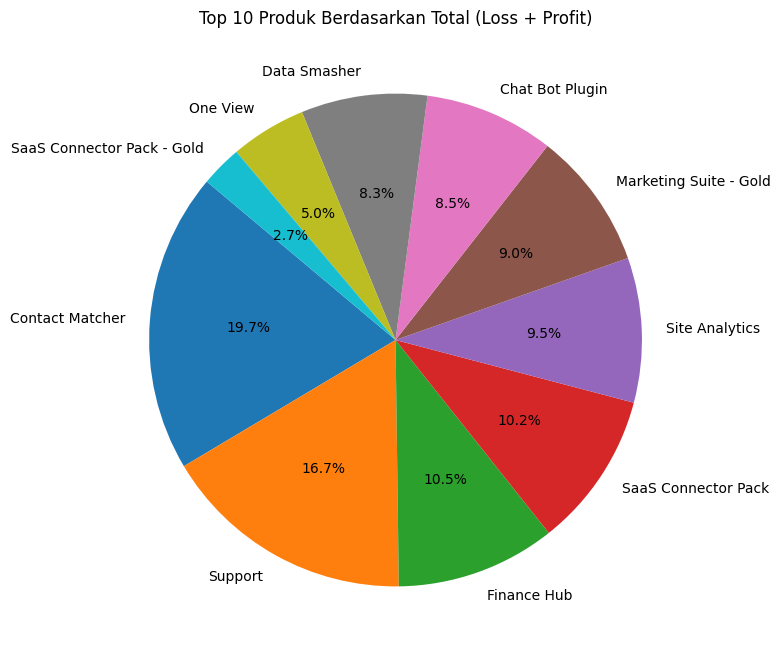

In [ ]:
top10_profit = df_ct.sort_values('Profit', ascending=False).head(10)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(top10_profit['Profit'], labels=top10_profit.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Produk Paling Menguntungkan (Profit)')
plt.show()

* Business insight:
Tim produk dan marketing sebaiknya berhenti mempromosikan dan memasarkan Saas Connector Pack- Gold dan One View, mengingat profit margin nya sangat kecil, sehingga tidak sepadan dengan biaya operasional dan tenaga yang dikeluarkan.

Cross-tab & grafik 10 negara dengan transaksi terbanyak dan status profit

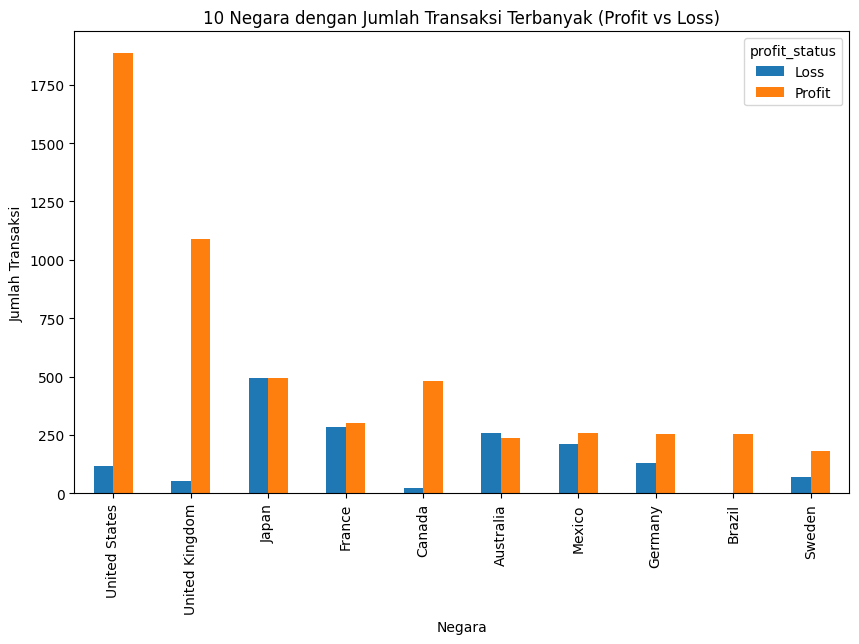

In [77]:
import matplotlib.pyplot as plt

# Cross-tab Country vs Profit/Loss
df_ct = pd.crosstab(saas_sales['Country'], saas_sales['profit_status'])
df_ct['Total'] = df_ct.sum(axis=1)

# Urutkan berdasarkan total transaksi
df_ct = df_ct.sort_values('Total', ascending=False)

# Plot 10 negara teratas
df_ct.drop(columns='Total').head(10).plot(
    kind='bar',
    figsize=(10,6),
    title='10 Negara dengan Jumlah Transaksi Terbanyak (Profit vs Loss)'
)
plt.ylabel("Jumlah Transaksi")
plt.xlabel("Negara")
plt.show()

Kita bisa melihat 10 negara dengan jumlah transaksi terbesar.
* Dari grafik terlihat mana negara yang sebagian besar transaksinya untung, dan mana yang cenderung rugi.
* hampir semua negara (kecuali Jepang, Prancis, Australia, dan Meksiko) menunjukkan profit yang jauh lebih besar daripada loss.
* Jepang dan Prancis menunjukkan loss vs profit yang hampir sama, sementara Australia kerugian transaksi lebih besar daripada keuntungannya. Profit Meksiko lebih besar, tapi jumlahnya tidak terlalu signifikan dibandingkan dengan loss Meksiko.

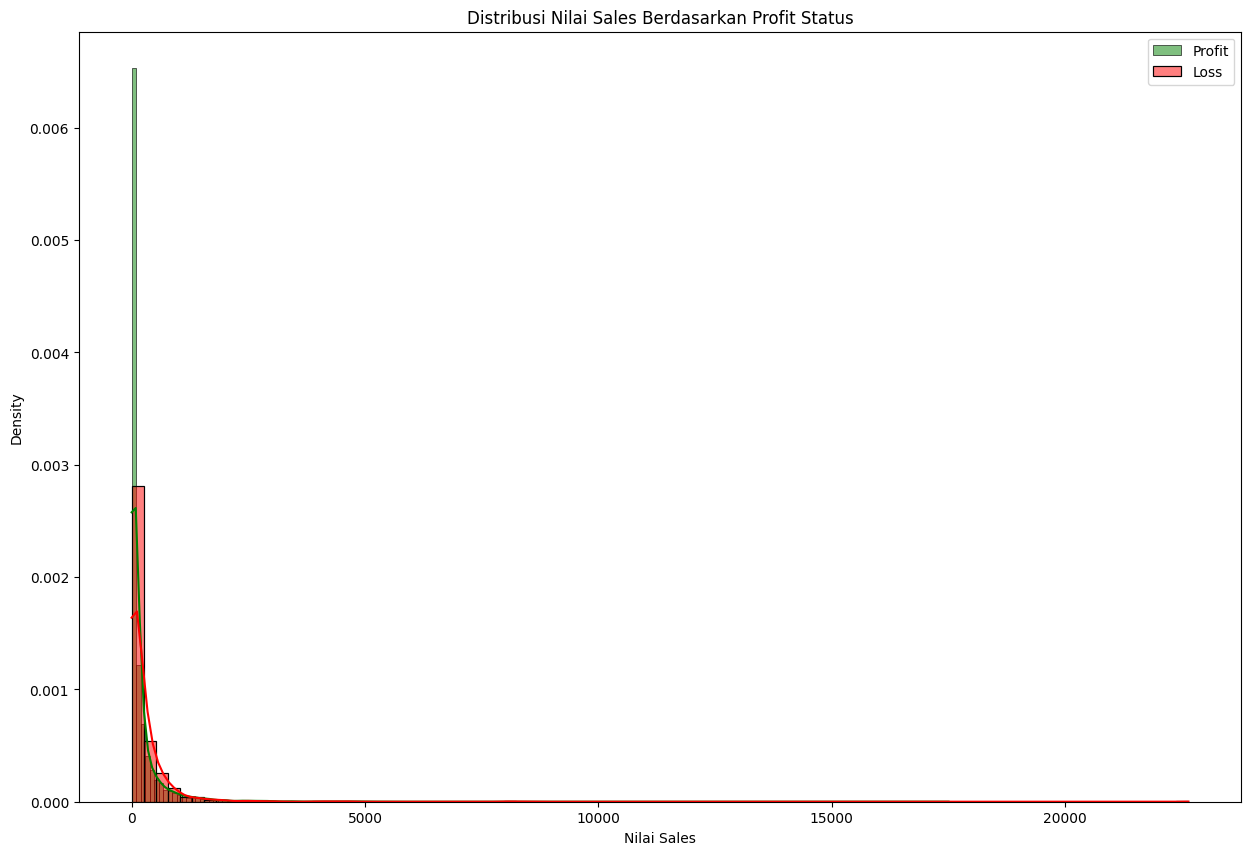

In [81]:
# Distribusi nilai Sales berdasarkan Profit vs Loss

import seaborn as sns

plt.figure(figsize=(15,10))
sns.histplot(saas_sales[saas_sales['profit_status']=='Profit']['Sales'], 
             label='Profit', color='green', kde=True, stat='density') 
# KDE (Kernel Density Estimate) = cara untuk memperkirakan bentuk sebaran data  dengan menambahkan garis lengkung halus di atasnya.
sns.histplot(saas_sales[saas_sales['profit_status']=='Loss']['Sales'], 
             label='Loss', color='red', kde=True, stat='density')

plt.title('Distribusi Nilai Sales Berdasarkan Profit Status')
plt.legend()
plt.xlabel("Nilai Sales")
plt.ylabel("Density")
plt.show()

Temuan Utama dari grafik di atas:

* Sebagian besar nilai Sales sangat kecil (mendekati 0):
  - Baik transaksi Profit (hijau) maupun Loss (merah) terkonsentrasi di sisi kiri (mendekati 0).
  - Artinya, mayoritas transaksi dalam dataset SaaS ini melibatkan nilai penjualan yang rendah.

* Ekor panjang ke kanan (distribusi miring/right-skewed):
  - Ada beberapa transaksi dengan nilai penjualan sangat tinggi (outlier) hingga lebih dari 20.000.
  - Namun, jumlahnya sangat sedikit dibandingkan dengan transaksi yang bernilai kecil.

* Kurva merah (Loss) dan hijau (Profit) hampir tumpang tindih:
 - Ini berarti baik transaksi yang menghasilkan laba maupun rugi memiliki pola distribusi nilai penjualan yang mirip.
 - Perbedaannya mungkin bukan di jumlah penjualannya, tapi di struktur biaya, diskon, atau faktor lain.

 * Insight bisnis:
 - Kita harus fokus mengoptimalkan proses untuk volume tinggi penjualan kecil.

## 4.5 Analisis lebih lanjut: Discount Analysis

1. Apakah transaksi dengan diskon lebih tinggi lebih sering menghasilkan loss?
2. Atau sebaliknya: apakah diskon rendah cenderung menghasilkan profit?



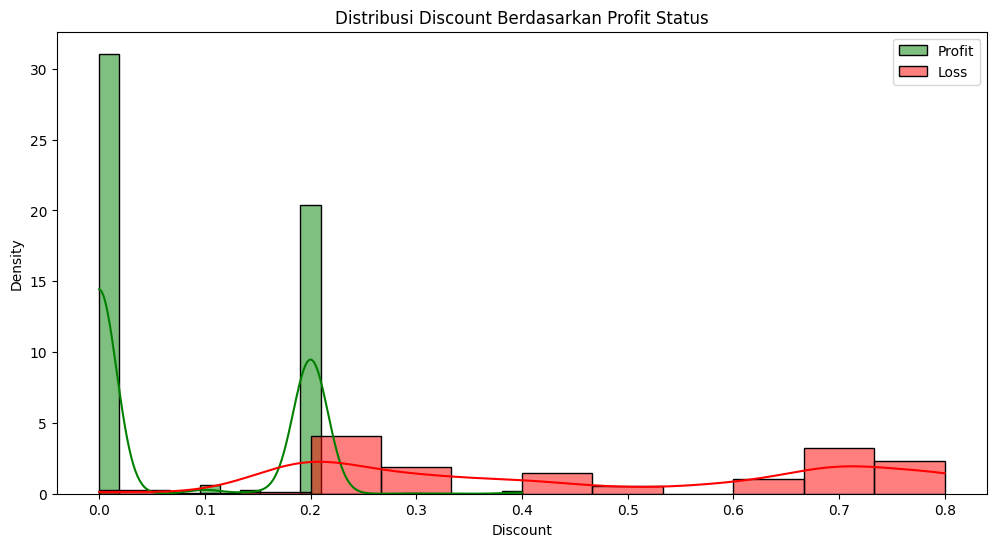

In [82]:
plt.figure(figsize=(12,6))

sns.histplot(saas_sales[saas_sales['profit_status']=='Profit']['Discount'], 
             label='Profit', color='green', kde=True, stat='density')
sns.histplot(saas_sales[saas_sales['profit_status']=='Loss']['Discount'], 
             label='Loss', color='red', kde=True, stat='density')

plt.title('Distribusi Discount Berdasarkan Profit Status')
plt.legend()
plt.xlabel('Discount')
plt.ylabel('Density')
plt.show()

Interpretasi Distribusi Discount Berdasarkan Loss vs Profit Status:

1. Profit (Hijau):
   - Mayoritas transaksi yang menghasilkan Profit terjadi pada discount rendah (sekitar 0% dan 20%).
   - Walaupun ada irisan kecil pada diskon rendah (0–0.2), artinya tidak semua transaksi dengan diskon rendah otomatis profit (ada sebagian kecil yang tetap rugi).
   
2. Loss (Merah):
   - Distribusi Loss lebih banyak muncul di diskon tinggi (> 20% sampai 80%).

## Uji Normalitas Kolom Sales

In [262]:
from scipy.stats import mannwhitneyu

stats, pval = mannwhitneyu(
    saas_sales[saas_sales['profit_status']=='Profit']['Sales'],
    saas_sales[saas_sales['profit_status']=='Loss']['Sales'],
    alternative='two-sided'  
)

if pval <= 0.05:
    print('Menolak Ho: Ada perbedaan signifikan Sales antara Profit dan Loss')
else:
    print('Menerima Ho: Tidak ada perbedaan signifikan Sales antara Profit dan Loss')

print(f"statistik uji = {stats}, p-value = {pval}")

Menerima Ho: Tidak ada perbedaan signifikan Sales antara Profit dan Loss
statistik uji = 7583272.5, p-value = 0.05710018134522


Dari uji statistik di atas, bisa kita simpulkan bahwa : besar-kecilnya Sales tidak otomatis menentukan apakah transaksi itu untung atau rugi (Profit/Loss).
Ini berarti bisa jadi ada faktor lain (misalnya diskon, segmentasi pelanggan, memaksimalkan sumber daya untuk pemasaran produk tertentu, dll.) yang lebih menjelaskan kenapa transaksi menjadi Profit atau Loss dibanding Sales itu sendiri.

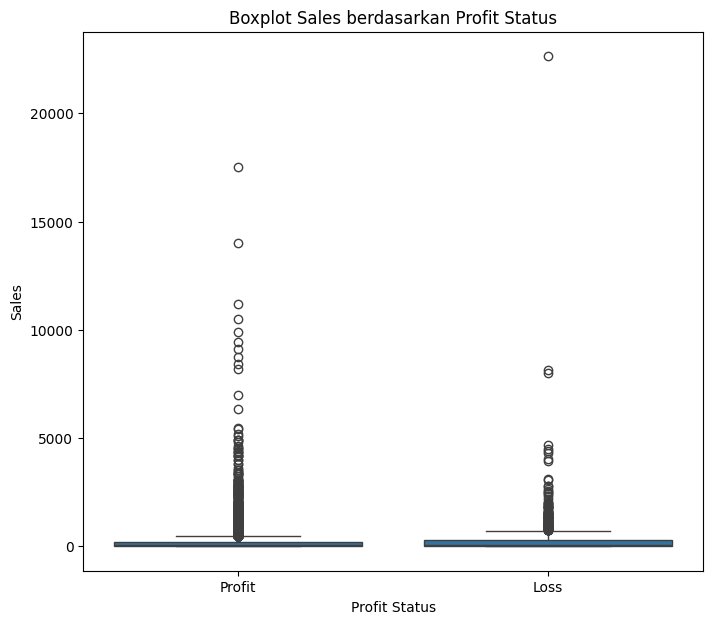

In [105]:
plt.figure(figsize=(8,7))
sns.boxplot(y='Sales', x='profit_status', data=saas_sales)
plt.title('Boxplot Sales berdasarkan Profit Status')
plt.ylabel('Sales')
plt.xlabel('Profit Status')
plt.show()

* Pada boxplot di atas, bisa kita lihat bahwa, sejalan dengan analisis statistik uji Mann-Whitney sebelumnya, median Sales antara Profit dan Loss tidak berbeda jauh. 
* Terdapat outlier pada transaksi dengan sales besar, baik untuk Profit maupun Loss. Outlier adalah titik-titik yang muncul di atas box, merupakan penjualan yang jauh lebih tinggi dibandingkan dengan pola penjualan pada umumnya (mayoritas). 
* Bisnis sangat bergantung pada frekuensi tinggi dari transaksi berskala kecil. Ini menunjukkan bahwa masalah utama perusahaan bukanlah volume penjualan, melainkan kontrol margin dan efisiensi biaya, karena median nilai penjualan sangat mirip antara transaksi yang untung dan yang rugi.
* Terdapat transaksi dengan nilai Penjualan sangat tinggi (mencapai lebih dari $15.000) yang masih menghasilkan keuntungan positif. Pelanggan ini adalah tipe pelanggan ideal, sehingga kita perlu menjaga komunikasi, kualitas service, dan kemungkinan memberikan bundling service atau produk untuk menjaga retensi pelanggan ini.
* Terdapat transaksi dengan nilai penjualan tinggi (mencapai sekitar $8.000) yang menghasilkan kerugian bersih bagi perusahaan.Ini merupakan major concern yang mengindikasikan kelemahan sistemik dalam kebijakan harga, diskon, atau efisiensi operasional. 

# 5. Cohort Analysis 

- Melacak Perilaku Pelanggan dari Waktu ke Waktu
- Bisa dipakai apakah ada kecenderungan pelanggan kita melakukan churn (pelanggan tidak menggunakan aplikasi kita lagi)

## 5.1. Menentukan Cohort

In [163]:
# Membaca data SaaS Sales

import pandas as pd
from operator import attrgetter

saas_sales = pd.read_csv('SaaS-Sales.csv', parse_dates=['Order Date'], low_memory= False)

# mengubah kolom Order Date menjadi format datetime, bukan tetap sebagai string.
# low_memory=False, pandas membaca seluruh file sekaligus dan menebak tipe data yang benar untuk setiap kolom.

In [164]:
# Buat salinan data untuk cohort analysis
cohort_dataset_copy = saas_sales.copy()

### 5.1.1. Tanggal pertama pembelian per customer 
- untuk setiap baris pelanggan, ambil tanggal pemesanan pertama dari pelanggan itu.

In [165]:
cohort_dataset_copy['Cohort_Date'] = cohort_dataset_copy.groupby('Customer')['Order Date'].transform('min') 
cohort_dataset_copy['Cohort_Date'] = pd.to_datetime(cohort_dataset_copy['Cohort_Date']) # Memastikan kolom Cohort_Date berformat datetime.

# Konversi ke format periode bulan
cohort_dataset_copy['Cohort_Date'] = cohort_dataset_copy['Cohort_Date'].dt.to_period('M')

# Periode transaksi saat ini
cohort_dataset_copy['Current_Period'] = cohort_dataset_copy['Order Date'].dt.to_period('M') # Mengubah datetime menjadi periode bulanan (year-month).

### 5.1.2. Hitung jumlah customer per cohort dan periode

In [166]:
customer_num_per_period = cohort_dataset_copy.groupby(['Cohort_Date', 'Current_Period'])['Customer'].nunique().reset_index()
# "Cohort Date" → bulan pertama pelanggan melakukan transaksi
# Current_Period → bulan transaksi saat ini.
# Period_Num → selisih bulan antara transaksi saat ini dan bulan pertama, digunakan untuk melihat retensi per periode. 

customer_num_per_period = customer_num_per_period.rename(columns={'Customer': 'Customer_Num'})

### 5.1.3. Periode relatif cohort

In [167]:
customer_num_per_period['Period_Num'] = (customer_num_per_period['Current_Period'] - customer_num_per_period['Cohort_Date']).apply(attrgetter('n'))

### 5.1.4  Tabel cohort

In [168]:
cohort_dataset_copy.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name',
       'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID',
       'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Cohort_Date', 'Current_Period'],
      dtype='object')

In [169]:
# Hitung jumlah customer unik per cohort dan periode

customer_num_per_period = cohort_dataset_copy.groupby(['Cohort_Date', 'Current_Period'])['Customer ID'].nunique().reset_index()
customer_num_per_period = customer_num_per_period.rename(columns={'Customer ID': 'Customer_Num'})

# Hitung periode relatif cohort (bulan ke-n sejak cohort)

customer_num_per_period['Period_Num'] = (customer_num_per_period['Current_Period'] - customer_num_per_period['Cohort_Date']
).apply(attrgetter('n'))

customer_num_per_period

,Cohort_Date,Current_Period,Customer_Num,Period_Num
0,2020-01,2020-01,27,0
1,2020-01,2020-02,9,1
2,2020-01,2020-03,11,2
3,2020-01,2020-04,11,3
4,2020-01,2020-05,14,4
...,...,...,...,...
357,2020-09,2023-05,1,32
358,2020-09,2023-07,1,34
359,2020-09,2023-09,1,36
360,2020-09,2023-11,1,38


In [170]:
# Membuat table cohort

cohort_table = customer_num_per_period.pivot_table(
    index='Cohort_Date',
    columns='Period_Num',
    values='Customer_Num'
)
cohort_table

Period_Num,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Cohort_Date,,,,,,,,,,,,,,,,,,,,,
2020-01,27.0,9.0,11.0,11.0,14.0,19.0,16.0,13.0,23.0,17.0,...,21.0,16.0,20.0,18.0,19.0,15.0,27.0,23.0,24.0,23.0
2020-02,18.0,7.0,8.0,8.0,6.0,7.0,8.0,14.0,11.0,15.0,...,7.0,14.0,12.0,14.0,14.0,16.0,16.0,16.0,16.0,NaN
2020-03,26.0,14.0,11.0,15.0,15.0,15.0,22.0,15.0,18.0,17.0,...,19.0,20.0,18.0,20.0,24.0,21.0,21.0,22.0,NaN,NaN
2020-04,11.0,7.0,8.0,2.0,5.0,7.0,5.0,7.0,8.0,NaN,...,6.0,7.0,6.0,8.0,7.0,8.0,10.0,NaN,NaN,NaN
2020-05,6.0,NaN,1.0,2.0,4.0,3.0,5.0,5.0,1.0,1.0,...,4.0,2.0,5.0,4.0,3.0,5.0,NaN,NaN,NaN,NaN
2020-06,5.0,1.0,2.0,3.0,4.0,5.0,4.0,2.0,2.0,3.0,...,4.0,3.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN
2020-07,2.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,NaN,...,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,3.0,2.0,1.0,1.0,2.0,1.0,NaN,1.0,3.0,2.0,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5.1.5 Visualisasi

In [172]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [173]:
customer_num_first_period = cohort_table.iloc[:,0]
customer_num_first_period

Cohort_Date
2020-01    27.0
2020-02    18.0
2020-03    26.0
2020-04    11.0
2020-05     6.0
2020-06     5.0
2020-07     2.0
2020-08     3.0
2020-09     1.0
Freq: M, Name: 0, dtype: float64

In [174]:
cohort_table_in_percentage = cohort_table.copy()

# membuat presentasi retensi dengan pembulatan 2 digit di belakang koma:
cohort_table_in_percentage = np.round(cohort_table_in_percentage.divide(customer_num_first_period, axis= 0), 2) 
cohort_table_in_percentage

Period_Num,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Cohort_Date,,,,,,,,,,,,,,,,,,,,,
2020-01,1.0,0.33,0.41,0.41,0.52,0.70,0.59,0.48,0.85,0.63,...,0.78,0.59,0.74,0.67,0.70,0.56,1.00,0.85,0.89,0.85
2020-02,1.0,0.39,0.44,0.44,0.33,0.39,0.44,0.78,0.61,0.83,...,0.39,0.78,0.67,0.78,0.78,0.89,0.89,0.89,0.89,NaN
2020-03,1.0,0.54,0.42,0.58,0.58,0.58,0.85,0.58,0.69,0.65,...,0.73,0.77,0.69,0.77,0.92,0.81,0.81,0.85,NaN,NaN
2020-04,1.0,0.64,0.73,0.18,0.45,0.64,0.45,0.64,0.73,NaN,...,0.55,0.64,0.55,0.73,0.64,0.73,0.91,NaN,NaN,NaN
2020-05,1.0,NaN,0.17,0.33,0.67,0.50,0.83,0.83,0.17,0.17,...,0.67,0.33,0.83,0.67,0.50,0.83,NaN,NaN,NaN,NaN
2020-06,1.0,0.20,0.40,0.60,0.80,1.00,0.80,0.40,0.40,0.60,...,0.80,0.60,0.80,1.00,1.00,NaN,NaN,NaN,NaN,NaN
2020-07,1.0,0.50,0.50,0.50,1.00,0.50,NaN,NaN,0.50,NaN,...,1.00,0.50,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,1.0,0.67,0.33,0.33,0.67,0.33,NaN,0.33,1.00,0.67,...,0.67,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,1.0,NaN,NaN,1.00,NaN,1.00,1.00,1.00,NaN,NaN,...,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Heatmap

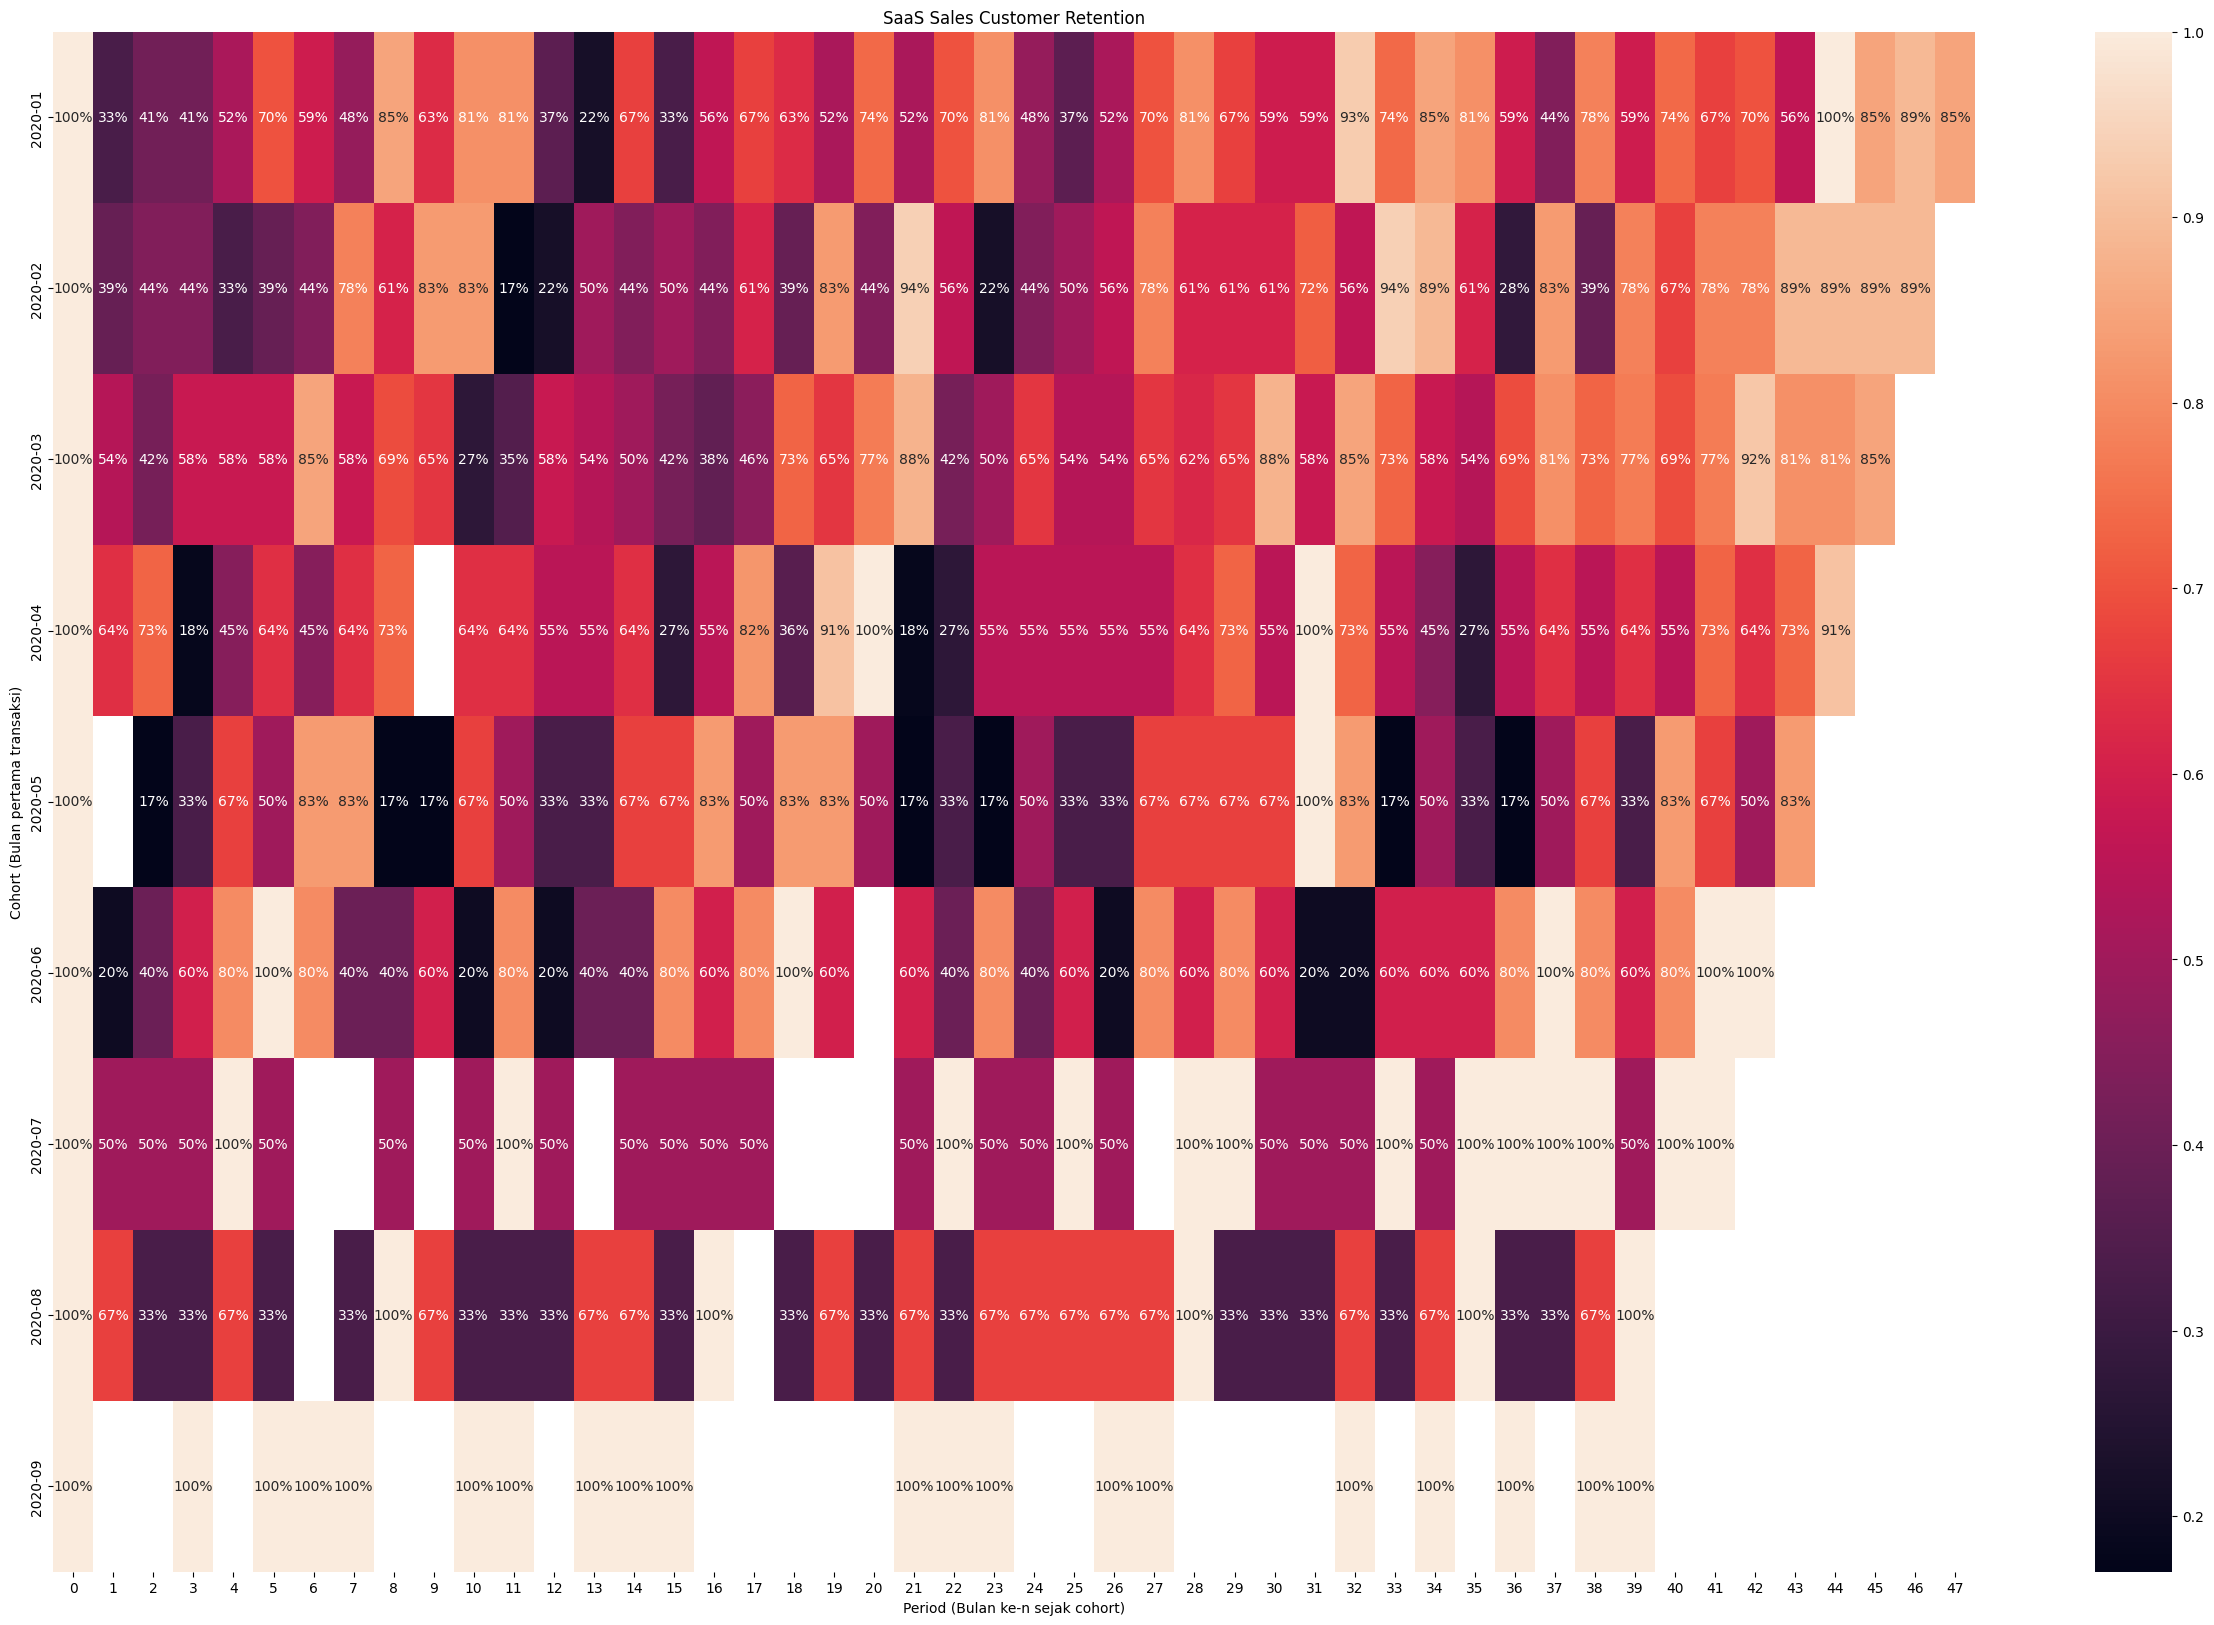

In [196]:
# 5. Heatmap

plt.figure(figsize=(31, 20))
sb.heatmap(
    data= cohort_table_in_percentage,
    annot=True,         # menampilkan angka di tiap sel
    fmt=".0%",          # format persentase
)

plt.title("SaaS Sales Customer Retention")
plt.xlabel("Period (Bulan ke-n sejak cohort)")
plt.ylabel("Cohort (Bulan pertama transaksi)")
plt.show()

Struktur heatmap :
- Baris (y-axis) → Cohort → bulan pertama transaksi pelanggan (bulan mereka bergabung).
- Kolom (x-axis) → Period → bulan ke-n setelah bulan pertama.
- Nilai di sel berwarna → persentase retention → proporsi customer dari cohort tersebut yang masih aktif pada bulan itu.
- sell putih artinya 0 customer atau tidak ada data pada periode tersebut

Business Insight:
* Penurunan Tajam Awal: Hampir semua kohort (terutama 2020-01 hingga 2020-04) menunjukkan penurunan retensi yang signifikan dari Periode 0 (100%) ke Periode 1 (sampai 50%) dan terus menurun hingga Periode ke-8. Mayoritas pelanggan pergi segera setelah bulan pertama atau kedua. Ini menunjukkan kemungkinan adanya masalah dengan pengalaman onboarding, Time-to-Value, atau kesenjangan antara janji pemasaran dengan realitas produk. Menurut Forbes, Time to Value (TTV) adalah waktu yang dibutuhkan pelanggan untuk mulai merasakan manfaat nyata dari produk atau layanan yang mereka beli.
* Pada periode ketiga dan keempat, tingkat retensi cenderung stabil atau menurun lebih landai, bahkan ada juga yang naik pada beberapa cohort. Hal ini mengindikasikan bahwa pelanggan yang bertahan selama 3-4 bulan pertama cenderung menjadi pelanggan yang loyal. Fokus harus beralih ke mempercepat nilai (Time-to-Value) agar lebih banyak pelanggan bisa melewati periode kritis 3 bulan pertama.
* Beberapa sel di kuadran kanan atas (misalnya, kohort 2020-01, periode 18+) menunjukkan retensi yang kuat (merah tua/gelap), membuktikan bahwa produk mampu mempertahankan pelanggan terbaik hingga hampir dua tahun. Berdasarkan analisis ini, tim marketing bisa menggunakan strategi berikut: Fitur apa yang mereka gunakan paling sering? Bagaimana kita bisa menanamkan fitur tersebut ke dalam onboarding pelanggan baru? 